imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew

# Task 1

In [3]:
import pandas as pd
data = pd.read_csv('motorbike_ambulance_calls.csv')

try:
    data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')
except ValueError as e:
    print(f"Error parsing dates: {e}")


print("Basic Statistical Information:")
print(data.describe())
print("Maximum Values:")
print(data.max())

print("Minimum Values:")
print(data.min())

print("Dataset Dimensions:")
print(data.shape)

Basic Statistical Information:
            index                           date            yr          mnth  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      0.502561      6.537775   
min        1.0000            2011-01-01 00:00:00      0.000000      1.000000   
25%     4345.5000            2011-07-04 00:00:00      0.000000      4.000000   
50%     8690.0000            2012-01-02 00:00:00      1.000000      7.000000   
75%    13034.5000            2012-07-02 00:00:00      1.000000     10.000000   
max    17379.0000            2012-12-31 00:00:00      1.000000     12.000000   
std     5017.0295                            NaN      0.500008      3.438776   

                 hr       holiday       weekday    workingday    weathersit  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean      11.546752      0.028770      3.003683      0.682721      1.425283   
min        

# Task 2

In [4]:
print("Data Types:")
print(data.dtypes)
print("Missing Values per Variable:")
print(data.isnull().sum())

Data Types:
index                  int64
date          datetime64[ns]
season                object
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
cnt                    int64
dtype: object
Missing Values per Variable:
index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


# Task 3

In [5]:
print("Task 3 - Missing Values per Variable:")
print(data.isnull().sum())

Task 3 - Missing Values per Variable:
index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


#Task 4

In [6]:
def transform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name], format='%m/%d/%y')
    return df

data = transform_date(data, 'date')

def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min()
    last_day = df[date_col_name].max()
    print(f"First day of dataset: {first_day}.\nLast day of dataset: {last_day}")

get_time_limits(data, 'date')

First day of dataset: 2011-01-01 00:00:00.
Last day of dataset: 2012-12-31 00:00:00


# Task 5

In [7]:
data_categorical = data[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']].copy()

# Task 6, 7

In [8]:
def encode_season(df: pd.DataFrame, season_col_name: str):
    season_mapping = {'spring': 1, 'summer': 2, 'fall': 3, 'winter': 4}
    df[season_col_name] = df[season_col_name].map(season_mapping)
    return df

data = encode_season(data, 'season')

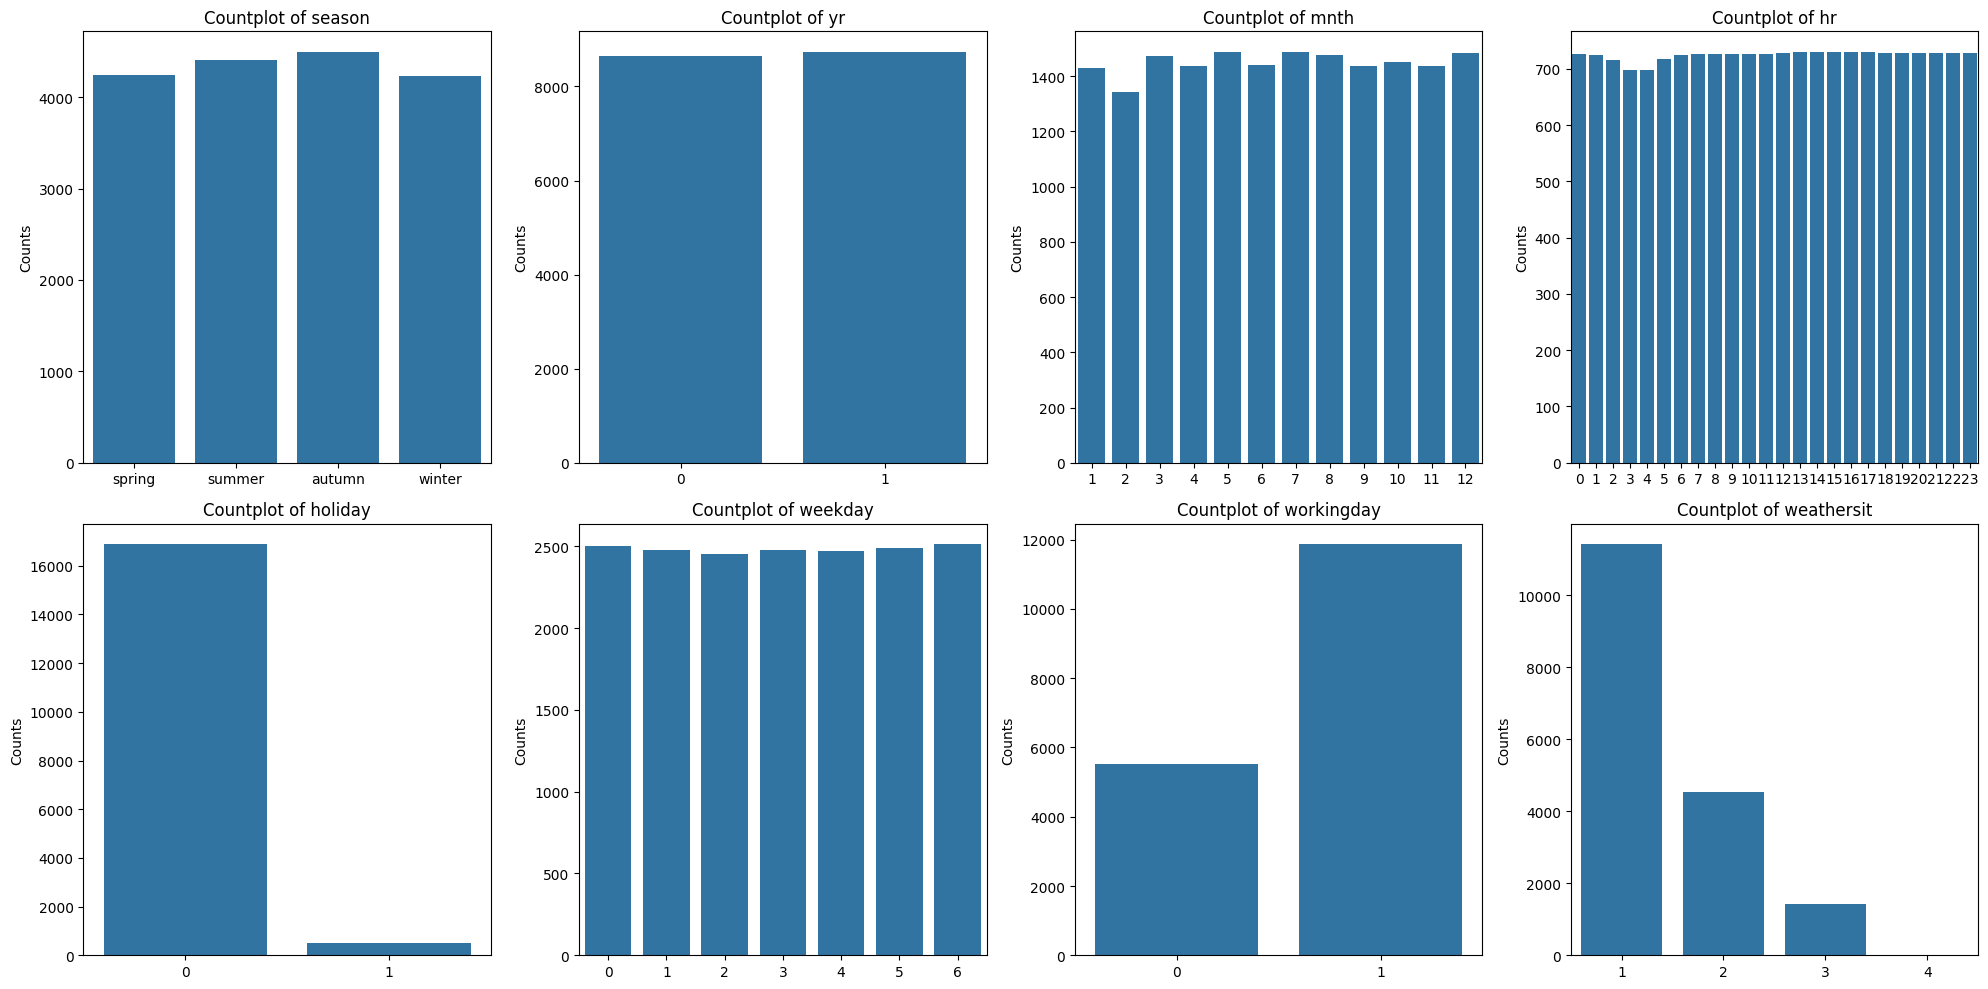

In [9]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical.columns, ax.flatten()):
    sns.countplot(x=data_categorical[variable], ax=subplot)
    subplot.set_title(f'Countplot of {variable}')
    subplot.set_xlabel('')
    subplot.set_ylabel('Counts')
plt.tight_layout()
plt.show()

# Task 8

In [10]:
data_numerical = data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].copy()

In [11]:
# Task 9,10,11,12,13

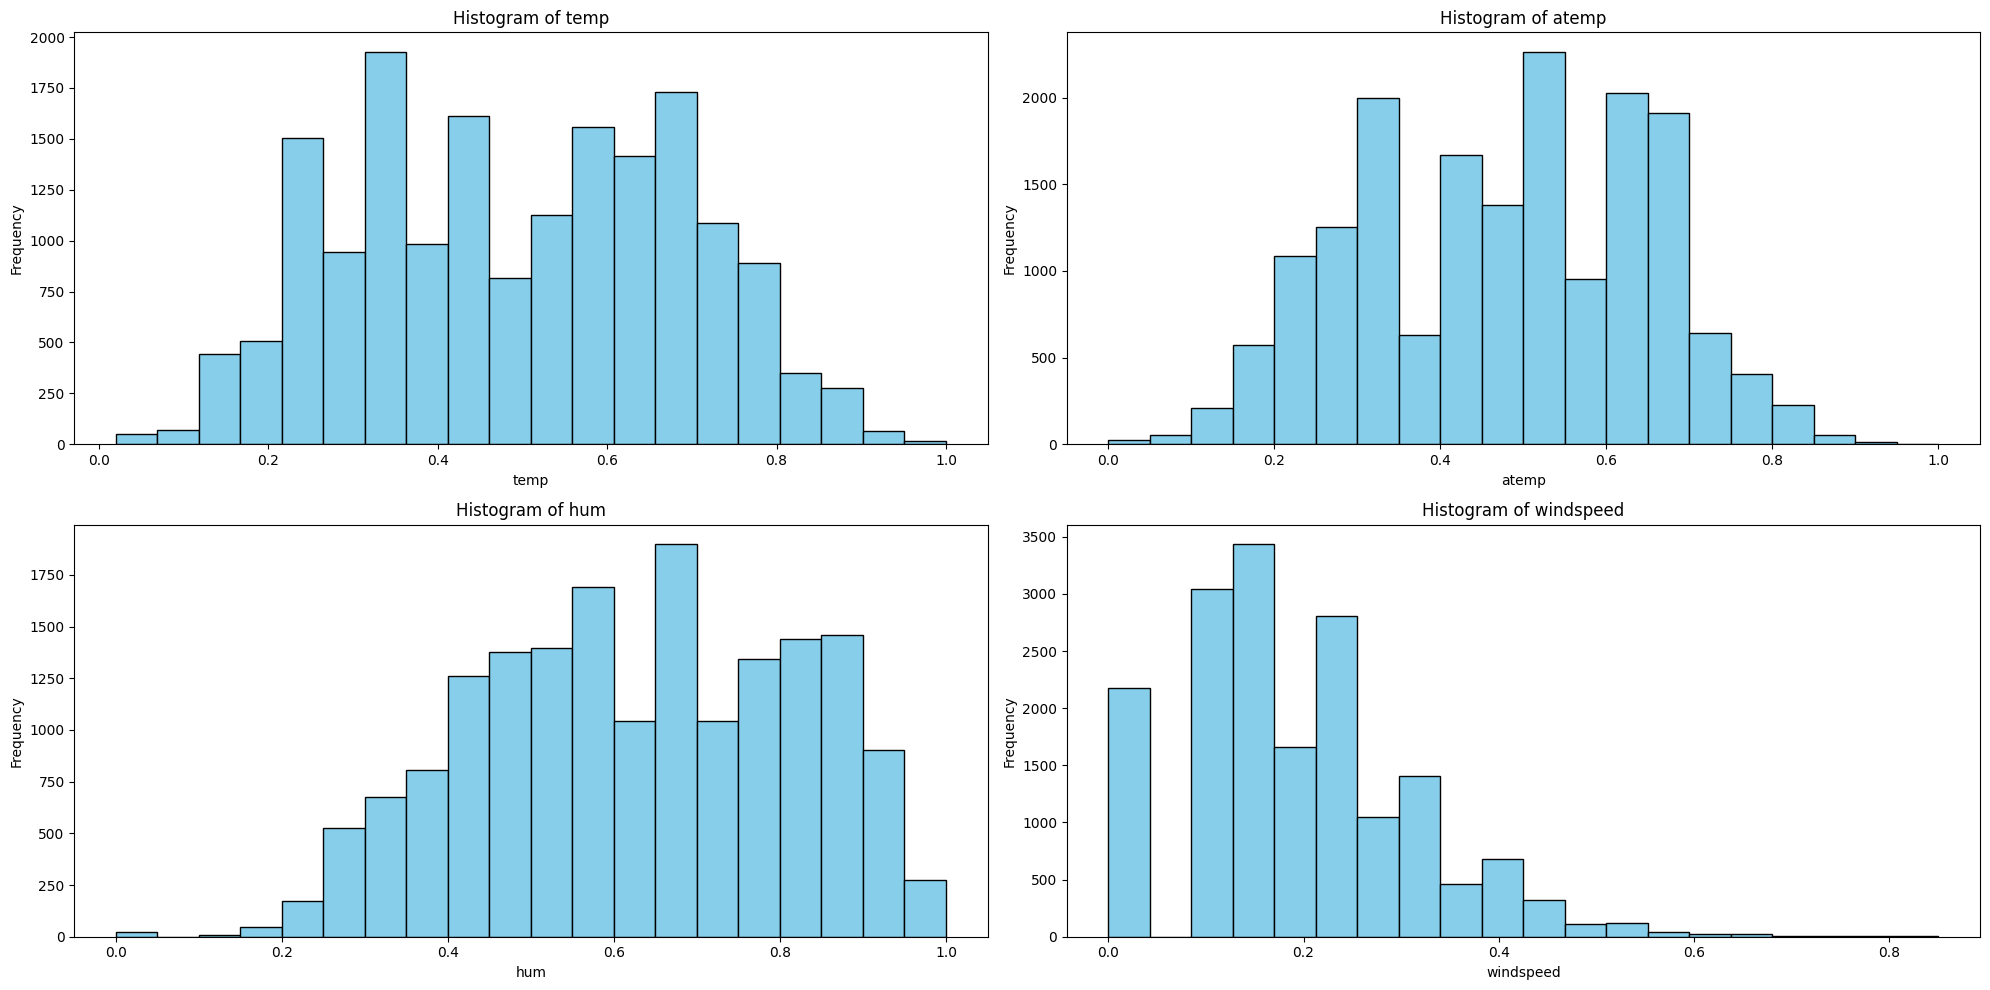

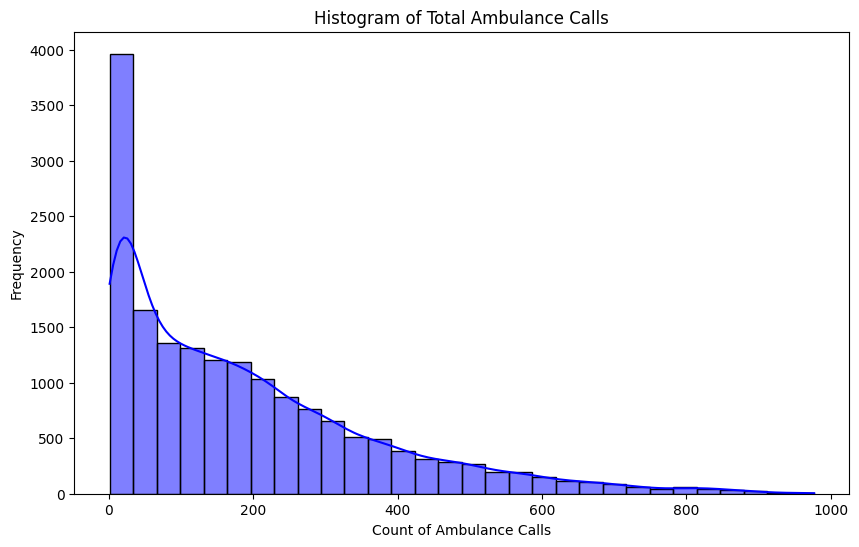

Skewness of the target variable cnt: 1.2773013463494975


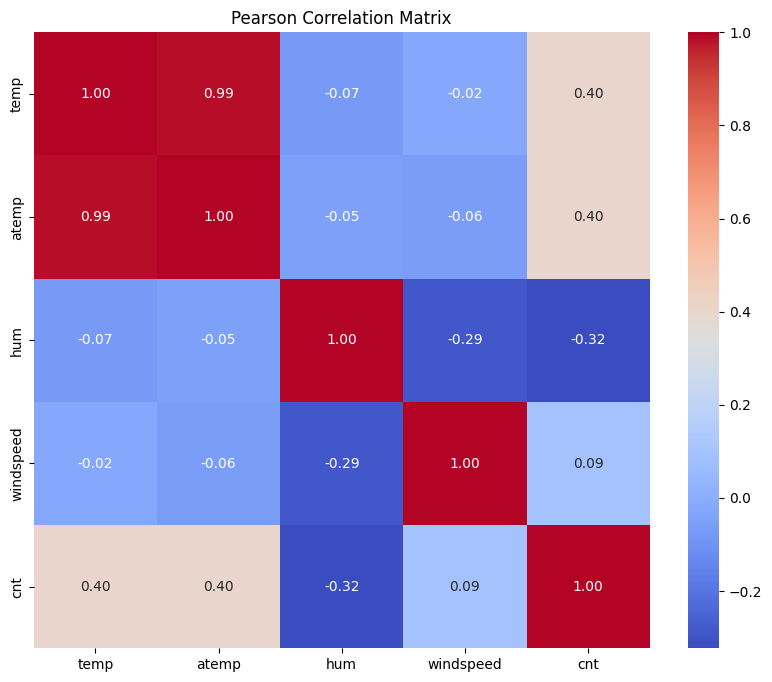

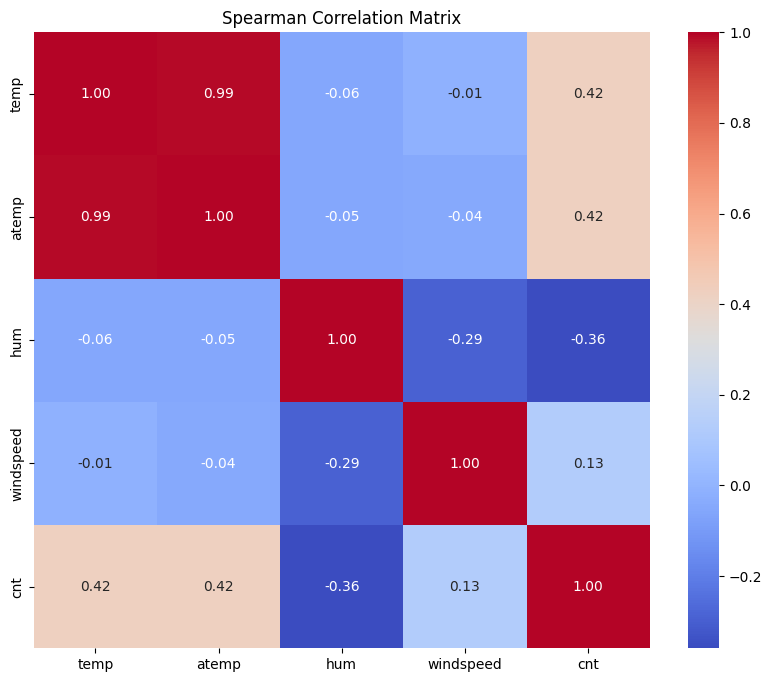

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(data_numerical.columns, ax.flatten()):
    subplot.hist(data_numerical[variable], bins=20, color='skyblue', edgecolor='black')
    subplot.set_title(f'Histogram of {variable}')
    subplot.set_xlabel(variable)
    subplot.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['cnt'], bins=30, kde=True, color='blue')
plt.title('Histogram of Total Ambulance Calls')
plt.xlabel('Count of Ambulance Calls')
plt.ylabel('Frequency')
plt.show()

# Skewness Calculation
cnt_skewness = skew(data['cnt'])
print(f"Skewness of the target variable cnt: {cnt_skewness}")

# Correlation Analysis
pearson_corr = data_numerical.corr(method='pearson')
spearman_corr = data_numerical.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Spearman Correlation Matrix')
plt.show()

# Task 14

MSE train: 10448.098, test: 10101.710
R^2 train: 0.688, test: 0.680


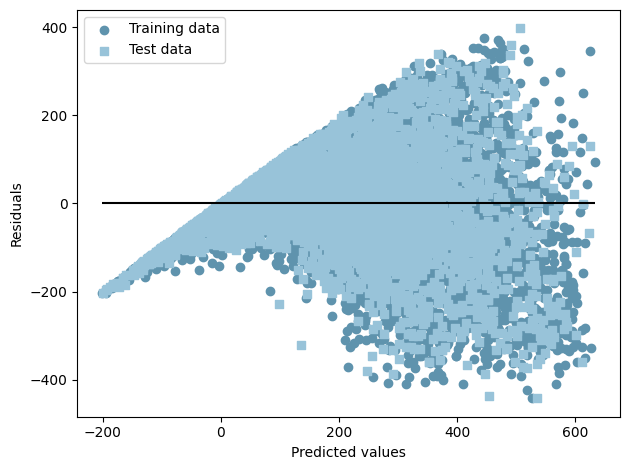

In [13]:
def get_dummies(df: pd.DataFrame):
    features = pd.concat([
        df,
        pd.get_dummies(df['season'], prefix='season'),
        pd.get_dummies(df['mnth'], prefix='mnth'),
        pd.get_dummies(df['weekday'], prefix='weekday'),
        pd.get_dummies(df['weathersit'], prefix='weathersit'),
        pd.get_dummies(df['hr'], prefix='hr')
    ], axis=1)
    features = features.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)
    return features

features = get_dummies(data)

features['night_hours'] = ((data['hr'] < 6) | (data['hr'] > 20)).astype(int)
features = features.drop('hr', axis=1)

features_lr = features.drop(['atemp', 'date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features_lr.drop('cnt', axis=1), features_lr['cnt'], test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('MSE train: {:.3f}, test: {:.3f}'.format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

plt.scatter(y_train_pred, y_train_pred - y_train, c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=min(y_train_pred.min(), y_test_pred.min()), xmax=max(y_train_pred.max(), y_test_pred.max()), color='black')
plt.tight_layout()
plt.show()